In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import animation
from matplotlib import colors
from mpl_toolkits.mplot3d import Axes3D
import initial_distributions

In [ ]:
def calc_psi(H_t,h,H_ref):
  """
  Calculate (initial) psi/ surface-to-reference distance.
  """
  return H_t + h - H_ref

def melt_rate(m_p, m_i, h, h_max):
    """
    Calculate total melt rate m based on albedo of melt ponds.
    :param m_p: enhancement factor due to the presence of melt ponds
    :param m_i: constant summer melt rate for unponded ice
    :param h: current pond depth
    :param h_max: global pond depth after which the ice-melting process doesn't quickens
    :return:
    """
    if h > h_max:
      return 1+ m_p/m_i
    else:
      return 1+ m_p/m_i * h/h_max

In [ ]:
def next_h(h_t, delta_t, m, rho_ice, rho_water, s):
    """
    Discretisation of dhdt. Calculates next value for h.
    :param h_t: np.array; current height of water
    :param delta_t: time step
    :param m: melting rate
    :param rho_ice: ice density
    :param rho_water: water density
    :param s: vertical seepage rate
    :return:
    """
    return h_t + delta_t * (m * (rho_ice / rho_water) - s)

Beta distribution

In [2]:
size = 100
psi_0, X,Y = initial_distributions.valley_distr(size=size)
initial_distributions.plot_distribution(psi_0,X,Y)

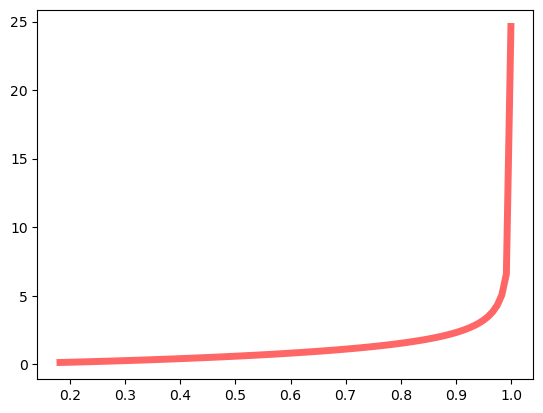

In [4]:
from scipy.stats import beta
a, b = 2.31, 0.627
x = np.linspace(beta.ppf(0.01, a, b),
                beta.ppf(0.99, a, b), 100)
plt.plot(x, beta.pdf(x, a, b),
       'r-', lw=5, alpha=0.6, label='beta pdf')